In [3]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
import math
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

pp File: ../InputData/pT_Rebin_1_pDevNONE/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/pT_Rebin_1_pDevNONE/pPb_SE_L0_Correlation_GMB_Ratio.root


In [4]:
print(dPhi_Bins)
print(dPhi_Bins[dphi_start_integral:])
print(dphi_start_integral)
print(zT_widths*2)

[0.0, 0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069, 3.141592653589793]
[1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069, 3.141592653589793]
4
[ 0.02670637  0.04097097  0.0628547   0.09642711  0.14793147  0.22694572
  0.34816366]


**root to numpy**

In [5]:
Corrs = ROOT_to_nparray()
#Plot_UB()
#print_from_Dict(Corrs)

**Correlated Subtraction**: $C_S = \frac{C_{SR} \ \ - \ \ (1-p) C_{BR}}{p}$

In [6]:
Correlated_Subtraction_Weights(Corrs)
#Plot_UB_Subtraction(Corrs)
#print_from_Dict(Corrs)

In [7]:
math.sqrt(0.0127**2 + 0.0127**2)

0.017960512242138307

**Pedestal Subtraction**

p-Pb_Uncorr_Error:
0.0153, 0.0153, 0.0153, 0.0153, 0.0153, 0.0153, 0.0153, 0.0153, 
0.0129, 0.0129, 0.0129, 0.0129, 0.0129, 0.0129, 0.0129, 0.0129, 
0.0088, 0.0088, 0.0088, 0.0088, 0.0088, 0.0088, 0.0088, 0.0088, 
0.0055, 0.0055, 0.0055, 0.0055, 0.0055, 0.0055, 0.0055, 0.0055, 
0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 0.0029, 
0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 
0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 0.0004, 

p-Pb_CSR:
-0.0292, -0.0362, -0.0138, 0.0000, 0.0382, 0.0568, 0.0838, 0.1454, 
-0.0454, -0.0104, -0.0207, 0.0000, 0.0206, 0.0517, 0.0913, 0.1173, 
-0.0000, 0.0129, 0.0215, 0.0000, 0.0368, 0.0510, 0.0468, 0.0937, 
-0.0089, -0.0100, 0.0028, 0.0000, 0.0185, 0.0141, 0.0225, 0.0517, 
-0.0087, 0.0041, 0.0003, 0.0000, -0.0008, 0.0017, 0.0204, 0.0269, 
0.0023, 0.0005, 0.0013, 0.0000, 0.0015, 0.0028, 0.0091, 0.0097, 
0.0004, 0.0000, 0.0010, 0.0000, 0.0002, 0.0010, 0.0009, 0.0023, 

p-Pb_CBR_Errors:
0.0065, 0.0064, 0.0061, 0.0062,

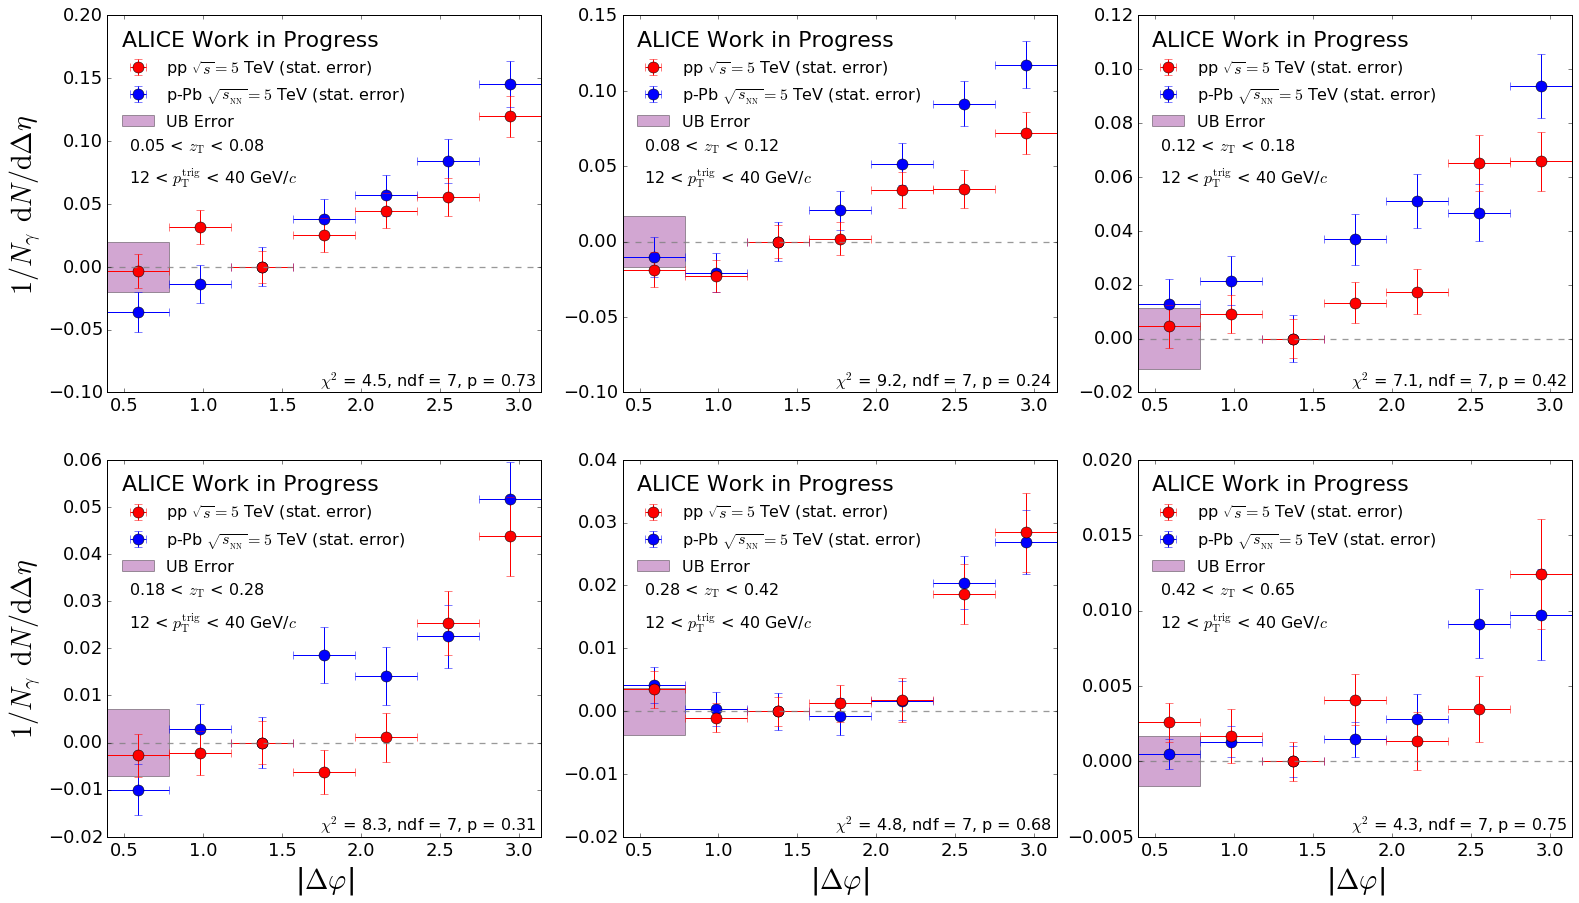

In [8]:
Ped_Sub_After_Cs(Corrs)
print_from_Dict(Corrs)
Plot_pp_pPb_Cs(Corrs)
#Compare_Cs_pTBins()


**Average Cs**: $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ in each $z_\mathrm{T}$ bin (i)

In [9]:
Avg_Corr = Cs_Weighted_Average(Corrs)
#Plot_pp_pPb_Cs(Avg_Corr)

In [ ]:
reload(functions_fragmentation)
from functions_fragmentation import *

In [ ]:
Frags = Get_Fragmentation(Corrs)
Combined_Frags = Average_FF(Frags)

Plot_pp_pPb_Avg_FF(Combined_Frags)

Plot_pp_pPb_Avg_FF_and_Ratio(Combined_Frags)

Frags_Avg_Cs = Get_Fragmentation(Avg_Corr,True)
#print_from_Dict(Frags_Avg_Cs)
#Plot_pp_pPb_Avg_FF(Frags_Avg_Cs)

print(zT_centers)

In [ ]:
Fit_FF_PowerLaw(Combined_Frags)

In [ ]:
reload(functions_fragmentation)
from functions_fragmentation import *

In [ ]:
pp_pPB_Avg_Ratio(Combined_Frags,0)
pp_pPB_Avg_Ratio(Frags_Avg_Cs,0)

## Compare Different Binning

In [ ]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_2_pDevNONE","pT_Rebin_3_ErrWeights","pT_Rebin_4_ErrWeights"]
string_descriptions = ["1 pT Bins","2 pT Bins","3 pT Bins","4 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
Compare_Cs_Averages(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,True)

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

## p-Pb / pp

**Weigthed Average:** $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

In [ ]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

In [ ]:
reload(functions_fragmentation)
from functions_fragmentation import *

In [ ]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_1_pDevPlus","pT_Rebin_1_pDevMinus","pT_Rebin_1_90p"]
string_descriptions = ["Cetral Purity","Purity Plus STDV","Purity Minus STDV","purity = 90%"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,False)